# Document Ingestion with PyMuPDF (fitz)

This notebook explores document ingestion using the PyMuPDF library.

In [ ]:
# Install dependencies if needed
# !pip install pymupdf

In [1]:
import fitz  # PyMuPDF
import os

In [2]:
# Set the PDF path
pdf_path = "../docs/DocLayNet.pdf"
print(f"Processing: {pdf_path}")
print(f"File exists: {os.path.exists(pdf_path)}")

Processing: ../docs/DocLayNet.pdf
File exists: True


In [3]:
# Open PDF and get basic info
doc = fitz.open(pdf_path)
print(f"Number of pages: {len(doc)}")
print(f"Metadata: {doc.metadata}")

Number of pages: 9
Metadata: {'format': 'PDF 1.5', 'title': 'DocLayNet: A Large Human-Annotated Dataset for Document-Layout Analysis', 'author': 'Birgit Pfitzmann, Christoph Auer, Michele Dolfi, Ahmed S. Nassar, and Peter Staar', 'subject': '-  Information systems  ->  Document structure; -  Applied computing  ->  Document analysis; -  Computing methodologies  ->  Machine learning; Computer vision; Object detection; ', 'keywords': 'PDF document conversion, layout segmentation, object-detection, data set, Machine Learning', 'creator': 'LaTeX with acmart 2018/04/14 v1.53 Typesetting articles for the Association for Computing Machinery and hyperref 2020-05-15 v7.00e Hypertext links for LaTeX', 'producer': 'pdfTeX-1.40.21', 'creationDate': 'D:20220603003241Z', 'modDate': 'D:20220603003241Z', 'trapped': '', 'encryption': None}


In [4]:
# Extract text from first page
page = doc[0]
text = page.get_text()
print("Text from first page:")
print(text[:500])

Text from first page:
DocLayNet: A Large Human-Annotated Dataset for
Document-Layout Analysis
Birgit Pfitzmann
IBM Research
Rueschlikon, Switzerland
bpf@zurich.ibm.com
Christoph Auer
IBM Research
Rueschlikon, Switzerland
cau@zurich.ibm.com
Michele Dolfi
IBM Research
Rueschlikon, Switzerland
dol@zurich.ibm.com
Ahmed S. Nassar
IBM Research
Rueschlikon, Switzerland
ahn@zurich.ibm.com
Peter Staar
IBM Research
Rueschlikon, Switzerland
taa@zurich.ibm.com
ABSTRACT
Accurate document layout analysis is a key requirement for h


In [5]:
# Extract images
images = []
for page_index in range(min(5, len(doc))):  # First 5 pages
    page = doc[page_index]
    image_list = page.get_images(full=True)
    for img_index, img in enumerate(image_list):
        xref = img[0]
        base_image = doc.extract_image(xref)
        images.append(base_image)
        print(f"Found image on page {page_index+1}, index {img_index}")

print(f"Total images extracted: {len(images)}")

Found image on page 1, index 0
Found image on page 1, index 1
Found image on page 1, index 2
Found image on page 1, index 3
Found image on page 1, index 4
Found image on page 4, index 0
Found image on page 4, index 1
Found image on page 5, index 0
Found image on page 5, index 1
Found image on page 5, index 2
Found image on page 5, index 3
Found image on page 5, index 4
Found image on page 5, index 5
Found image on page 5, index 6
Found image on page 5, index 7
Found image on page 5, index 8
Found image on page 5, index 9
Found image on page 5, index 10
Found image on page 5, index 11
Found image on page 5, index 12
Found image on page 5, index 13
Found image on page 5, index 14
Found image on page 5, index 15
Total images extracted: 23


image: ext=jpeg, size=71459 bytes


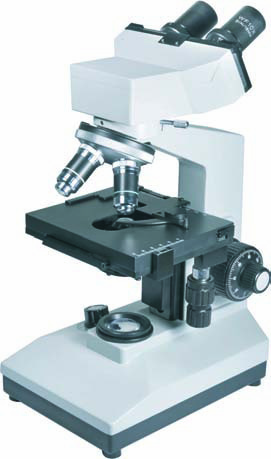

image: ext=png, size=587 bytes


image: ext=png, size=30104 bytes


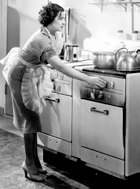

image: ext=png, size=31982 bytes


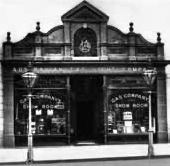

image: ext=png, size=58000 bytes


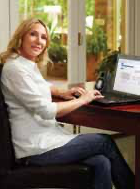

image: ext=jpeg, size=258627 bytes


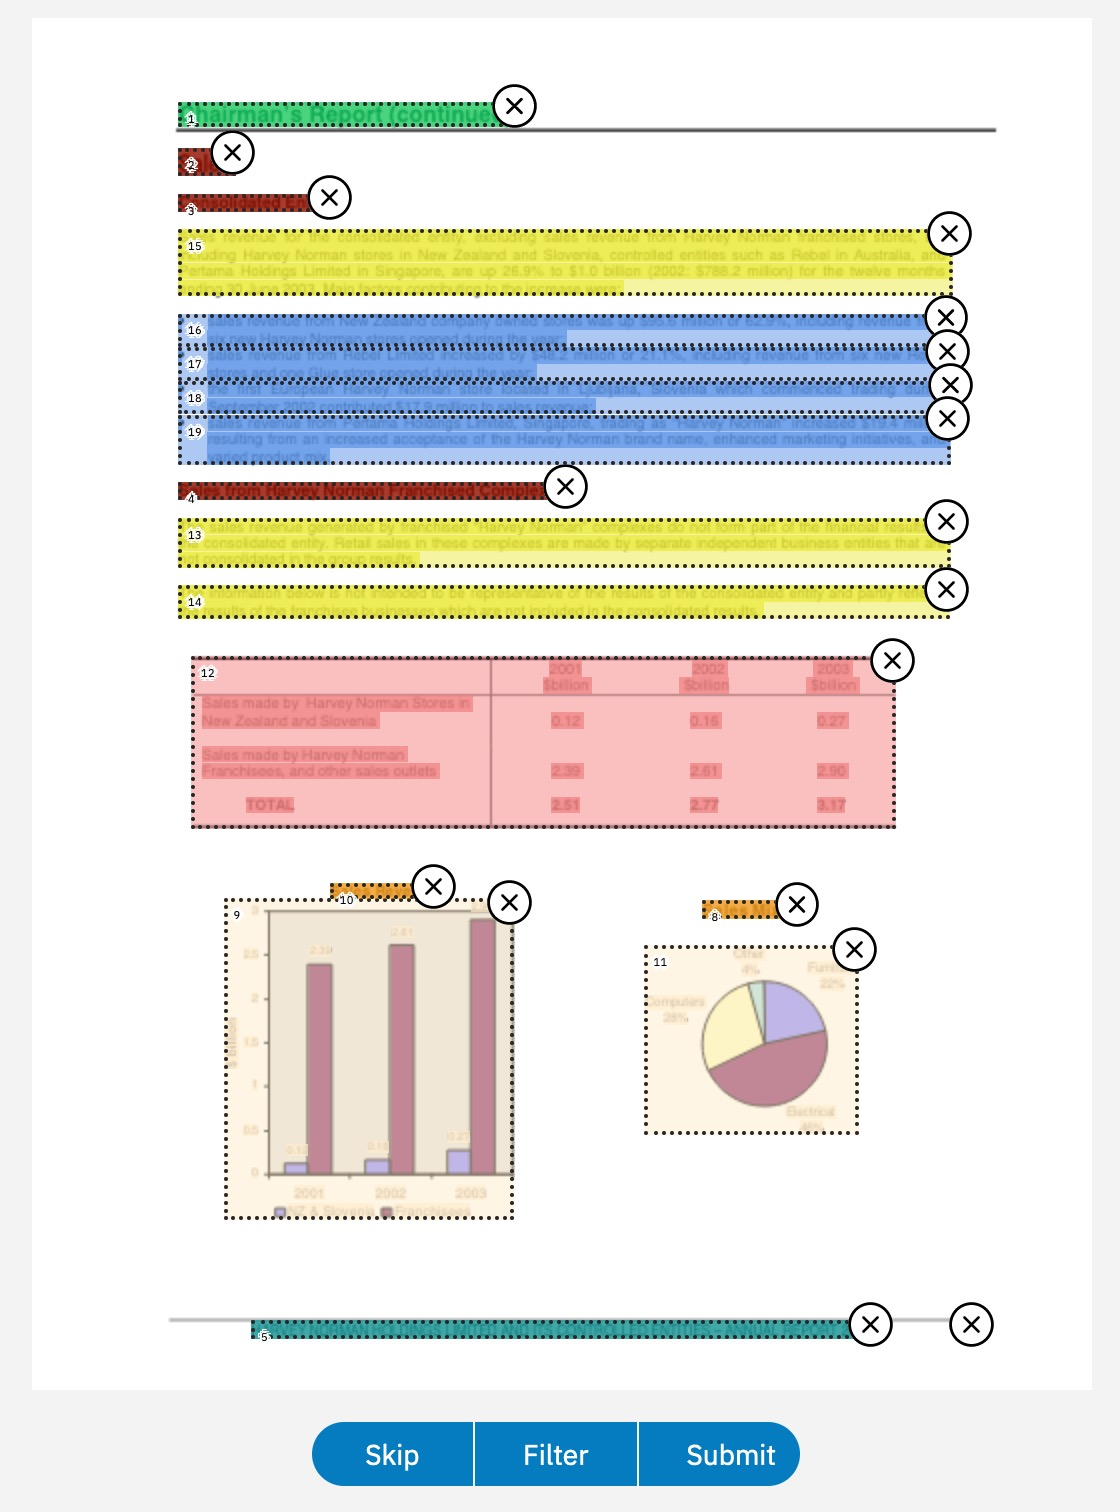

image: ext=jpeg, size=98245 bytes


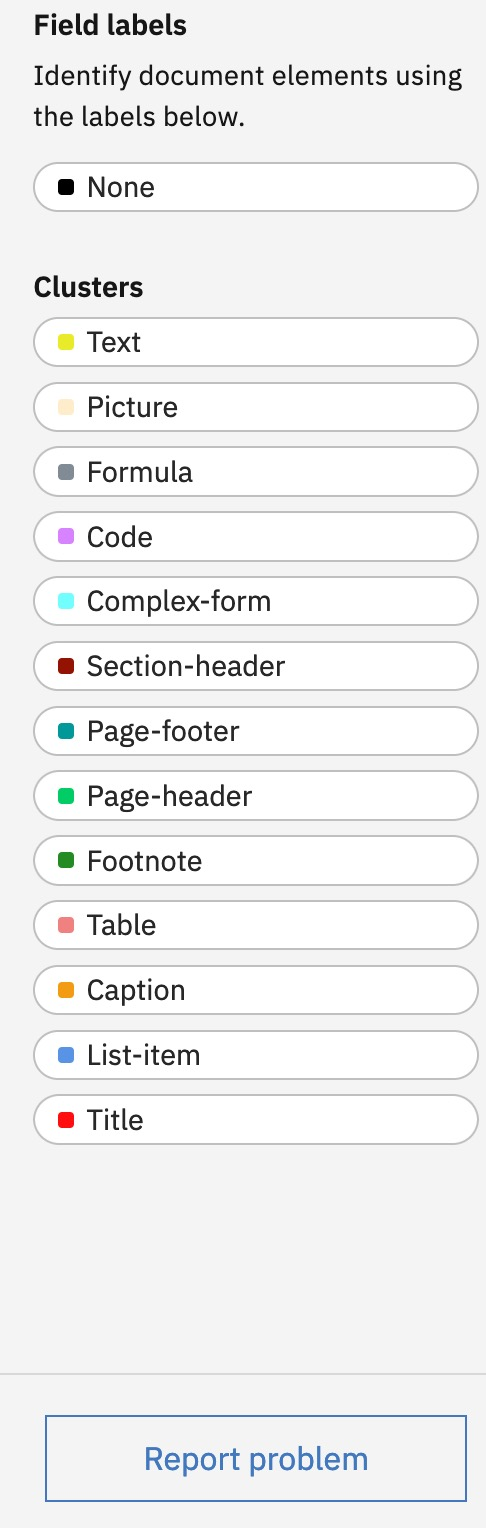

image: ext=jpeg, size=130653 bytes


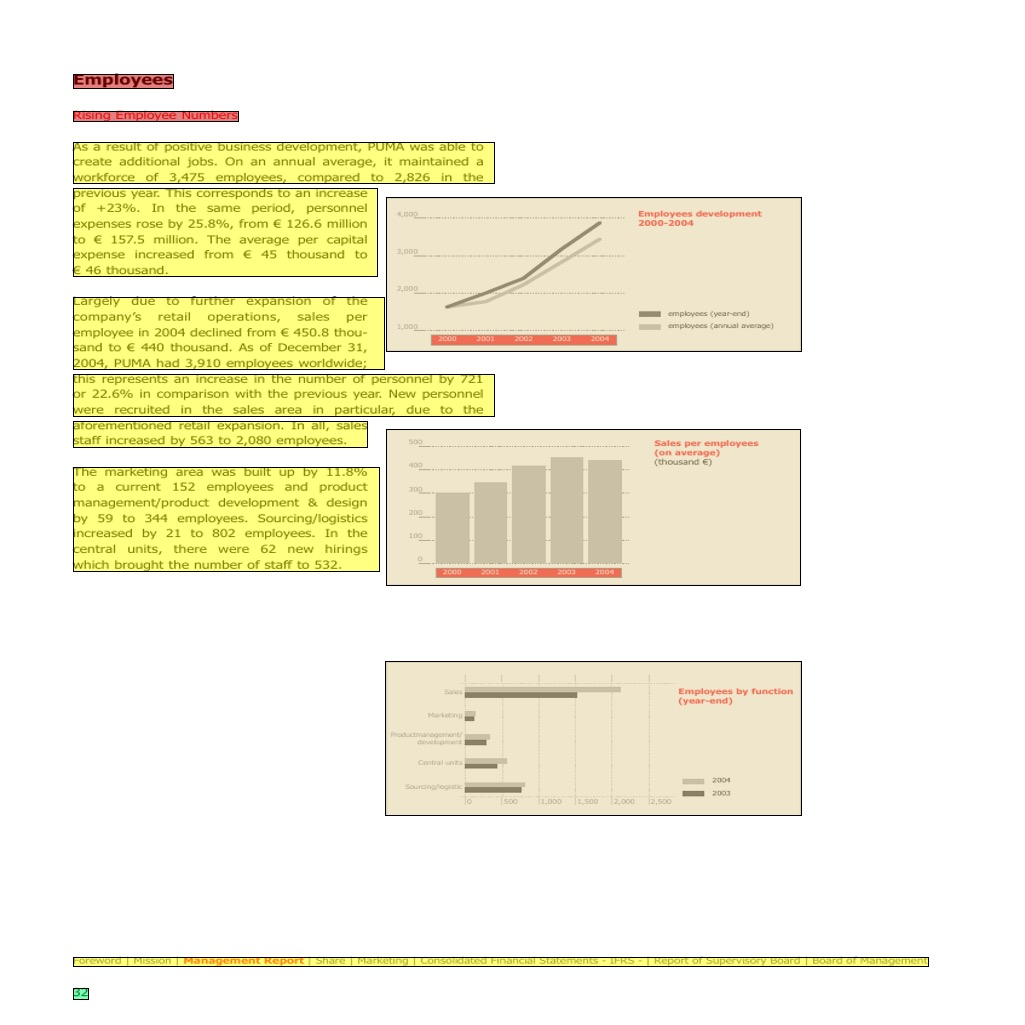

image: ext=jpeg, size=99292 bytes


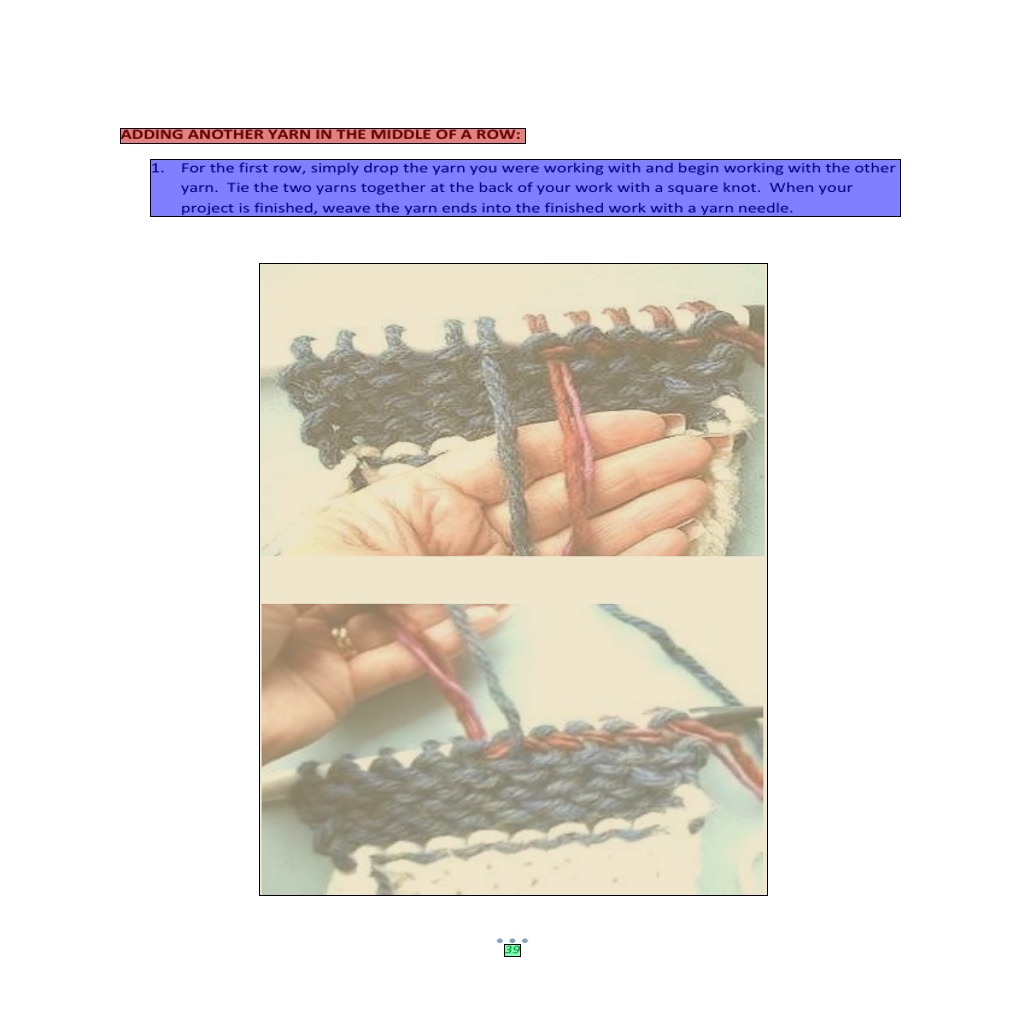

image: ext=jpeg, size=280973 bytes


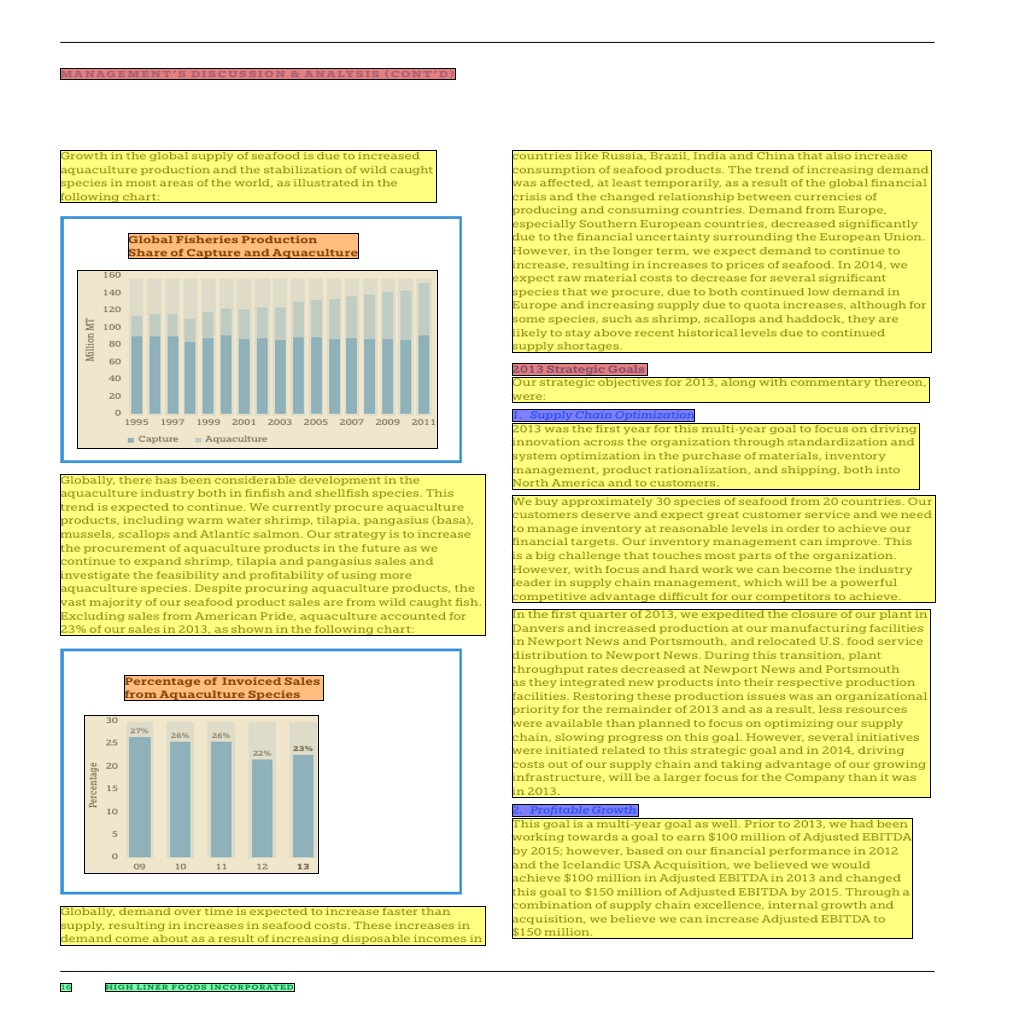

image: ext=jpeg, size=274299 bytes


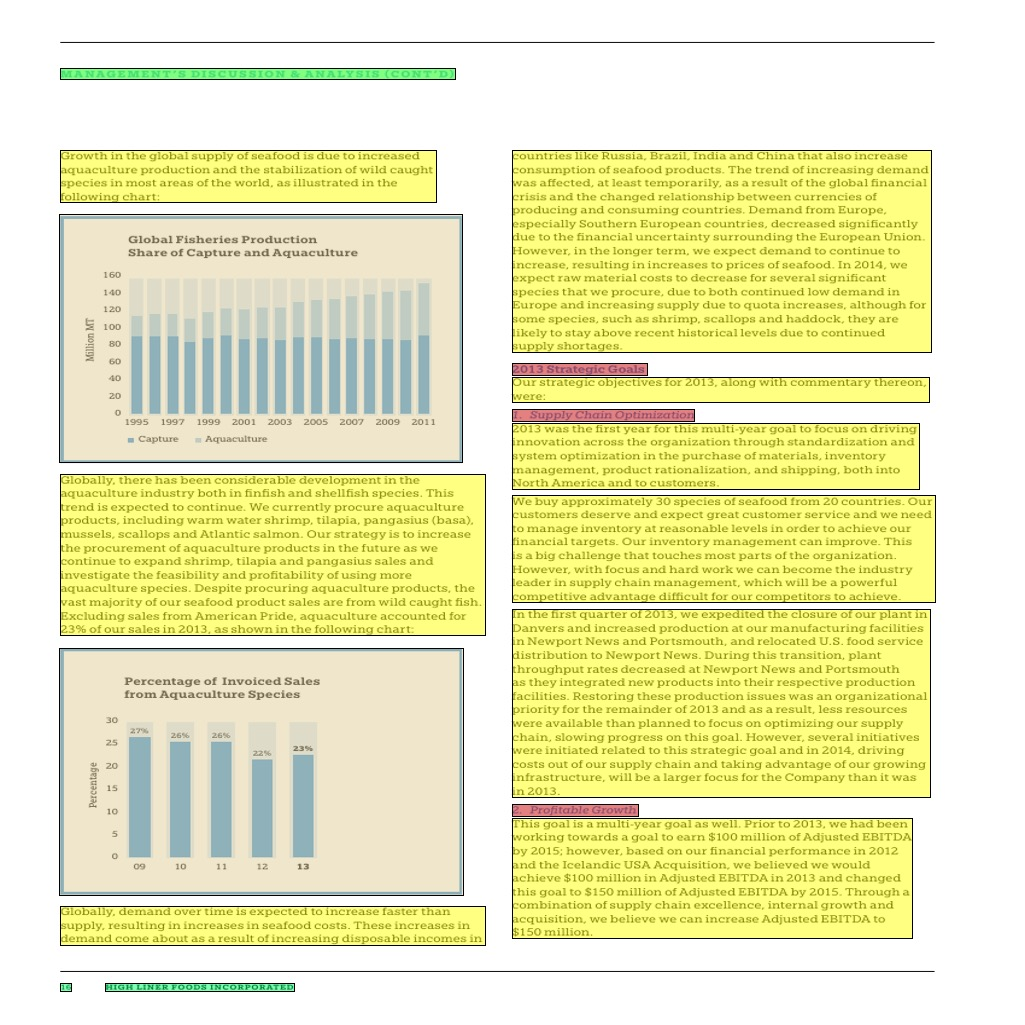

image: ext=png, size=184 bytes


image: ext=png, size=184 bytes


image: ext=png, size=184 bytes


image: ext=png, size=184 bytes


image: ext=jpeg, size=129239 bytes


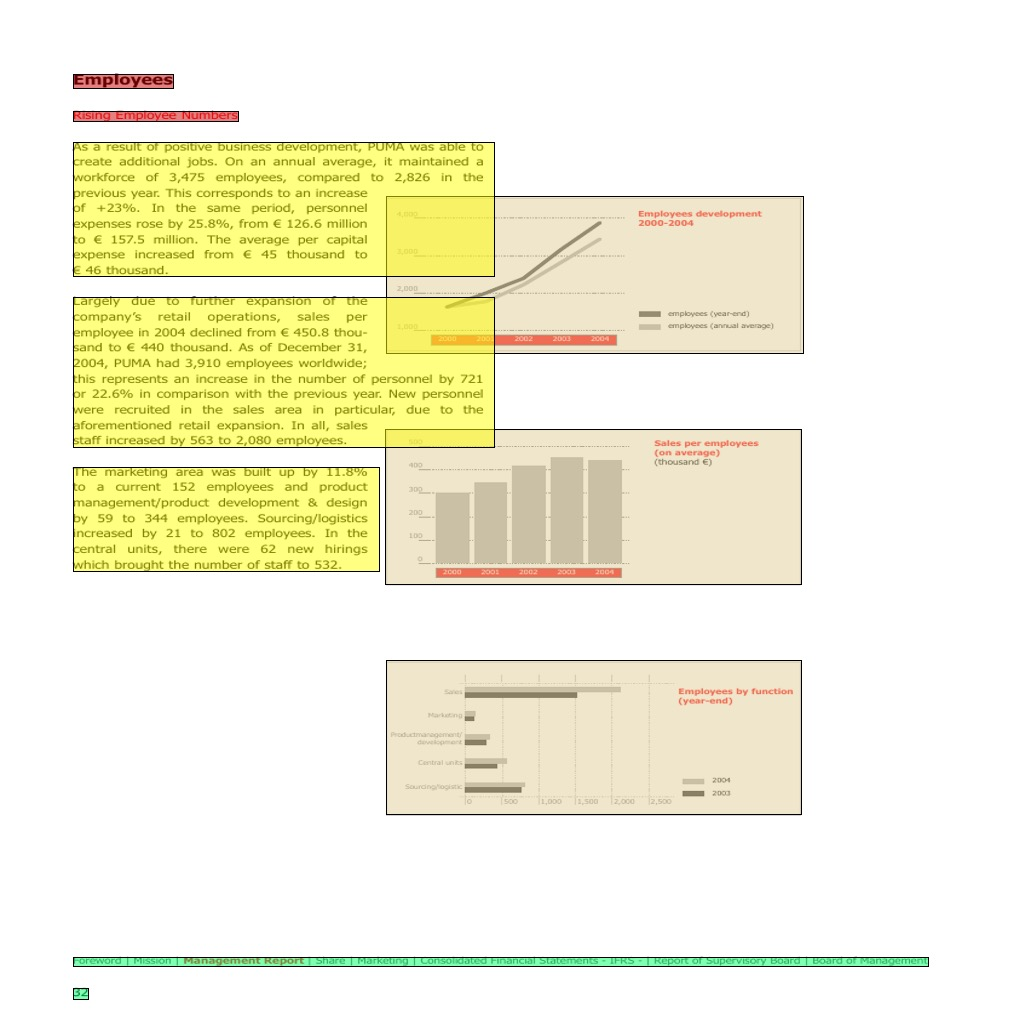

image: ext=jpeg, size=119379 bytes


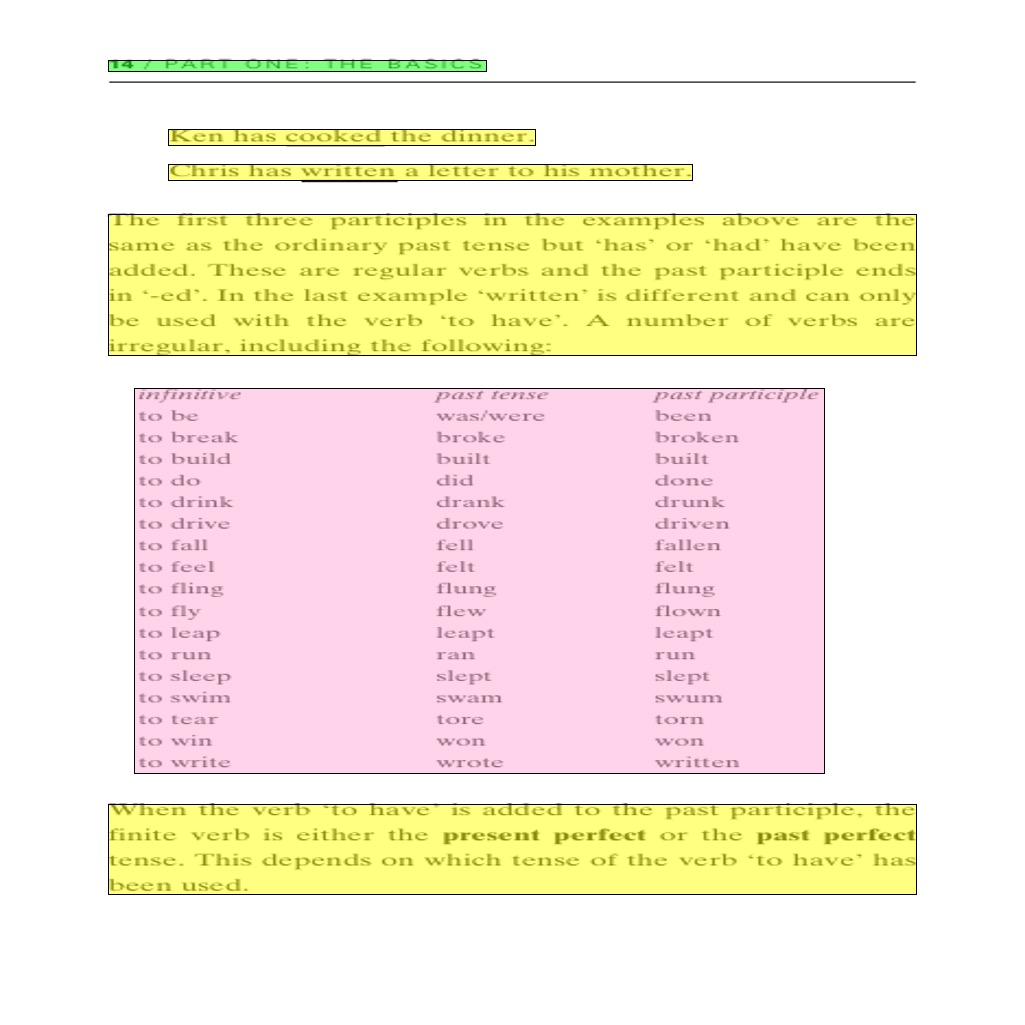

image: ext=jpeg, size=122920 bytes


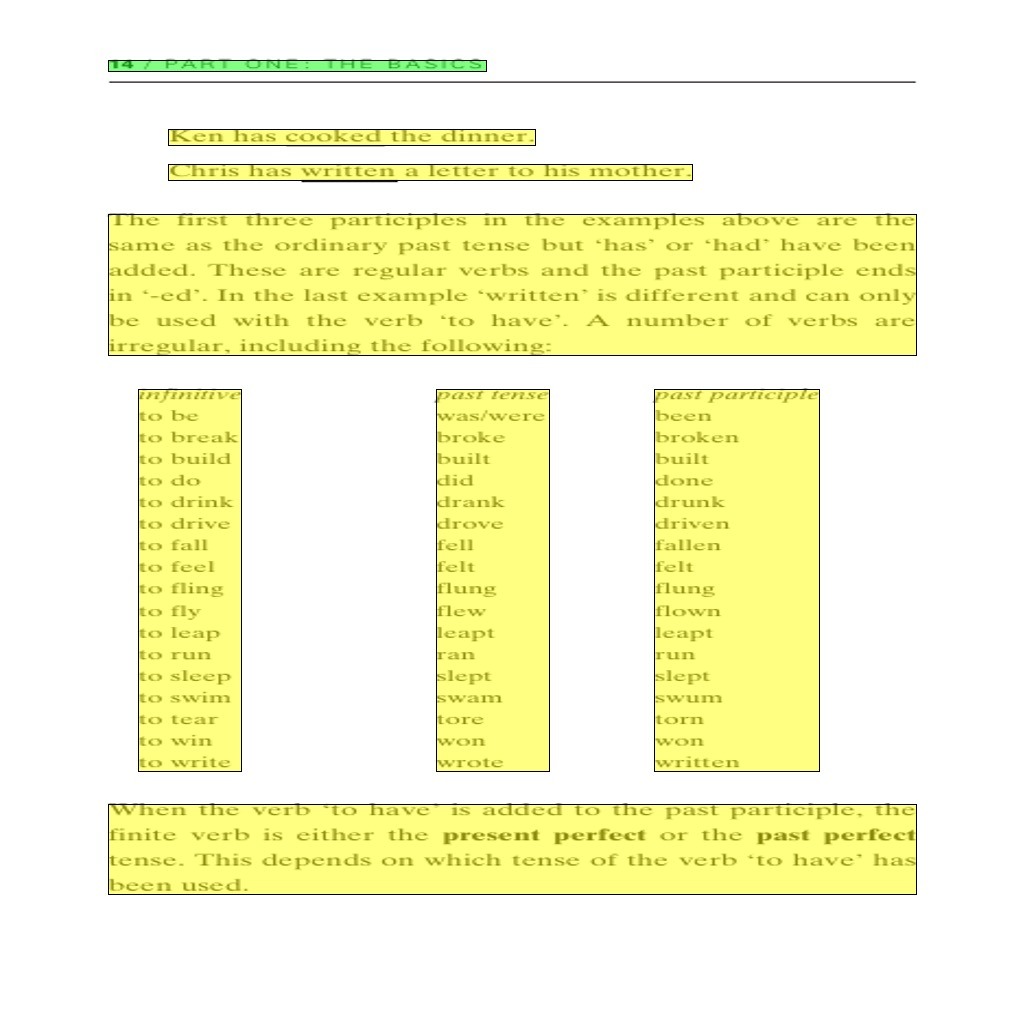

image: ext=png, size=184 bytes


image: ext=png, size=184 bytes


image: ext=png, size=184 bytes


image: ext=png, size=184 bytes


image: ext=jpeg, size=101327 bytes


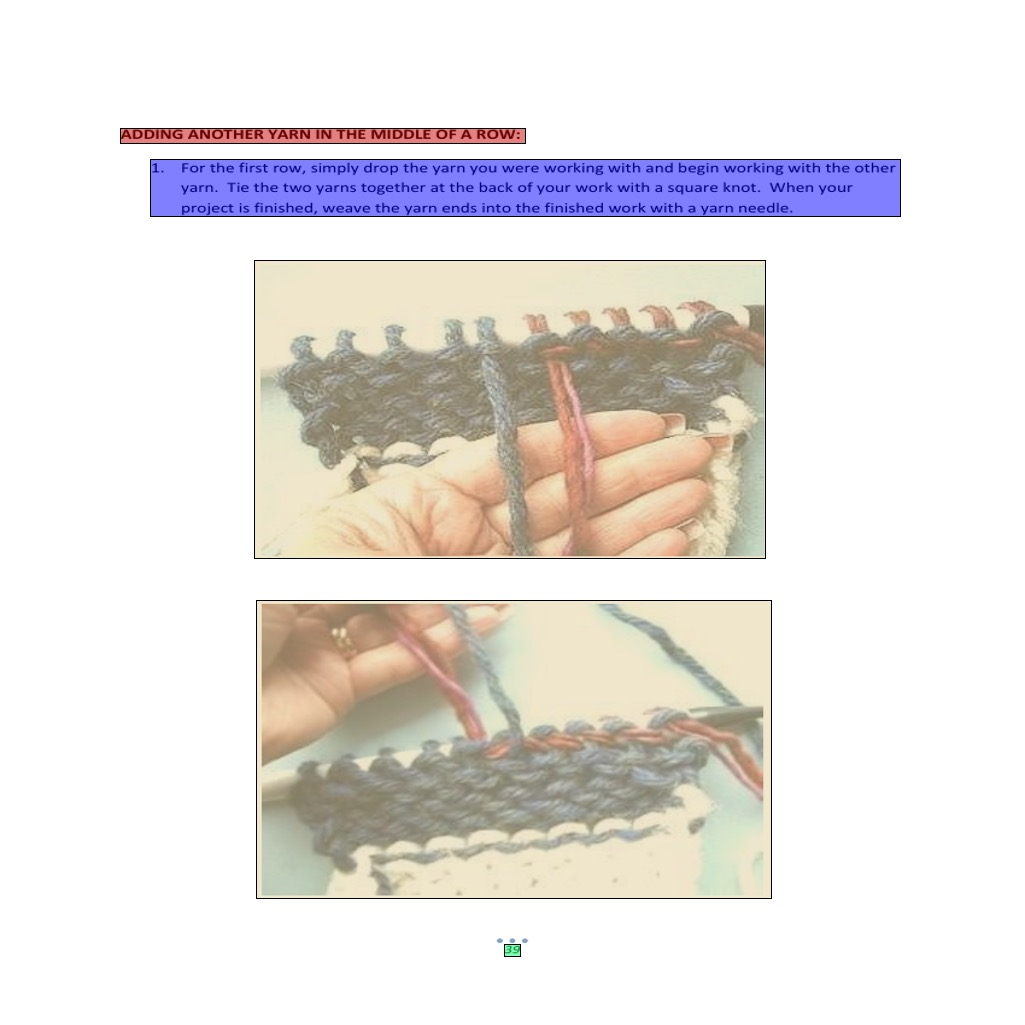

In [11]:
# Display image info
if images:
    img = images[0]
    for img in images:
        print(f"image: ext={img['ext']}, size={len(img['image'])} bytes")
        # To display, you can save and show
        with open('temp_image.' + img['ext'], 'wb') as f:
            f.write(img['image'])
        from PIL import Image
        Image.open('temp_image.' + img['ext']).show()
        os.remove('temp_image.' + img['ext']) # Clean up

In [12]:
# Close the document
doc.close()